In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm

In [2]:
# !curl https://raw.githubusercontent.com/JieYingWu/COVID-19_US_County-level_Summaries/master/data/counties.csv  -o ./counties.csv
# !curl https://raw.githubusercontent.com/JieYingWu/COVID-19_US_County-level_Summaries/master/data/deaths_timeseries.csv -o ./deaths_timeseries.csv
# !curl https://opendata.arcgis.com/datasets/6ac5e325468c4cb9b905f1728d6fbf0f_0.csv?outSR=%7B%22latestWkid%22%3A3857%2C%22wkid%22%3A102100%7D -o ../data/raw/hospitals.csv

## Pull Hospital Data

In [3]:
# Created by Michael
hospitals = pd.read_csv('../data/raw/hospitals.csv')[['TYPE', 'STATUS', 'COUNTYFIPS', 'BEDS']]
hospitals = hospitals[hospitals["STATUS"] == 'OPEN']
hospitals = hospitals[hospitals["TYPE"] == 'GENERAL ACUTE CARE']
hospitals = hospitals[hospitals["BEDS"].astype(str).astype(int) > 0]
hospitals["FIPS"] = hospitals["COUNTYFIPS"]
hospitals = hospitals[hospitals["FIPS"] != 'NOT AVAILABLE']
hospitals = hospitals.drop(["COUNTYFIPS", "STATUS"], axis=1)
hospitals["FIPS"] = hospitals["FIPS"].astype(str).astype(int)
fips_groups = hospitals.groupby("FIPS")

hosp_data = pd.DataFrame(columns=['FIPS', 'HospCt', 'Beds'])
for fips_code, grp in fips_groups:
    hosp_data = hosp_data.append({'FIPS': fips_code, 'HospCt': len(grp), 'Beds': sum(grp["BEDS"])}, ignore_index=True)   

hosp_data.head()

,FIPS,HospCt,Beds
0,1001,1,85
1,1003,3,332
2,1005,1,74
3,1007,1,35
4,1011,1,61


In [4]:
counties = pd.read_csv('../data/raw/counties_05-08.csv')
# print(counties.columns.values)
counties = counties.dropna(how='any')
# counties['FIPS'] = counties['FIPS'] .astype('int')
counties = counties.set_index('FIPS')
# print(counties.where(counties['FIPS'] == 36061))
print(counties.loc[36061,], '\n')
# counties = counties.filter(['FIPS', 'Rural-urban_Continuum Code_2013', 'Density per square mile of land area - Population'])
counties = counties.filter(['FIPS', 'Rural-urban_Continuum Code_2013', 'Density per square mile of land area - Population', \
                            'Percent of adults with less than a high school diploma 2014-18',\
                            "Percent of adults with a bachelor's degree or higher 2014-18", 'Unemployment_rate_2018', \
                            'Med_HH_Income_Percent_of_State_Total_2018', 'Mar Temp AVG / F' 'Apr Temp AVG / F' 'May Temp AVG / F', \
                            'Jun Temp AVG / F', 'Total_age65plus',  'Total households!!Average household size',\
                            'SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!Nursery school preschool'\
                            'SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!Kindergarten'\
                            'SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!Elementary school (grades 1-8)'\
                            'SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!High school (grades 9-12)'\
                            'SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!College or graduate school'])
counties = counties.dropna()
counties = counties.merge(hosp_data, left_on='FIPS', right_on='FIPS')
counties.head(20)

State                                           NY
Area_Name                          New York County
Rural-urban_Continuum Code_2013                  1
Urban_Influence_Code_2013                        1
Economic_typology_2015                           0
                                        ...       
Number of AGGRAVATED ASSAULTS                 6070
BURGLRY                                       3623
LARCENY                                      22730
MOTOR VEHICLE THEFTS                          1592
ARSON                                            0
Name: 36061, Length: 346, dtype: object 



,FIPS,Rural-urban_Continuum Code_2013,Density per square mile of land area - Population,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,Unemployment_rate_2018,Med_HH_Income_Percent_of_State_Total_2018,Jun Temp AVG / F,Total_age65plus,Total households!!Average household size,HospCt,Beds
0,1003,3.0,114.6,9.7,31.3,3.6,115.5,80.8,44571.0,2.57,3,332
1,1015,3.0,195.7,15.9,18.0,4.7,91.0,76.2,20247.0,2.51,3,552
2,1043,4.0,109.4,18.2,13.7,3.3,91.8,76.3,15446.0,2.71,1,145
3,1049,6.0,91.5,25.9,12.7,3.8,79.2,73.5,12322.0,2.66,1,134
4,1051,2.0,128.2,13.6,24.5,3.4,121.0,78.9,12400.0,2.57,2,138
5,1055,3.0,195.2,15.5,17.7,4.1,90.0,76.0,19487.0,2.62,2,627
6,1069,3.0,175.1,14.3,21.0,4.0,96.2,81.8,18639.0,2.67,2,655
7,1073,1.0,592.5,10.3,32.4,3.7,110.3,77.4,104547.0,2.51,9,3866
8,1077,3.0,138.8,12.6,23.9,4.2,97.6,75.2,18563.0,2.34,1,358
9,1081,3.0,230.8,9.5,34.1,3.6,98.1,77.6,19481.0,2.66,1,314


In [5]:
counties.columns.values

array(['FIPS', 'Rural-urban_Continuum Code_2013',
       'Density per square mile of land area - Population',
       'Percent of adults with less than a high school diploma 2014-18',
       "Percent of adults with a bachelor's degree or higher 2014-18",
       'Unemployment_rate_2018',
       'Med_HH_Income_Percent_of_State_Total_2018', 'Jun Temp AVG / F',
       'Total_age65plus', 'Total households!!Average household size',
       'HospCt', 'Beds'], dtype=object)

In [6]:
# counties = counties.set_index('FIPS')

In [7]:
counties.head()

,FIPS,Rural-urban_Continuum Code_2013,Density per square mile of land area - Population,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,Unemployment_rate_2018,Med_HH_Income_Percent_of_State_Total_2018,Jun Temp AVG / F,Total_age65plus,Total households!!Average household size,HospCt,Beds
0,1003,3.0,114.6,9.7,31.3,3.6,115.5,80.8,44571.0,2.57,3,332
1,1015,3.0,195.7,15.9,18.0,4.7,91.0,76.2,20247.0,2.51,3,552
2,1043,4.0,109.4,18.2,13.7,3.3,91.8,76.3,15446.0,2.71,1,145
3,1049,6.0,91.5,25.9,12.7,3.8,79.2,73.5,12322.0,2.66,1,134
4,1051,2.0,128.2,13.6,24.5,3.4,121.0,78.9,12400.0,2.57,2,138


In [8]:
deaths = pd.read_csv('../data/raw/time_series_covid19_deaths_US_05-08.csv')
# print(filtered.loc[36061,])
# print(deaths.columns.values)
deaths = deaths.drop(['UID', 'iso2', 'iso3', 'code3', 'Admin2', 'Population', 'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key'], axis=1)
# deaths = deaths.dropna()
deaths = deaths.set_index('FIPS')

deaths.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20
FIPS,,,,,,,,,,,,,,,,,,,,,
60.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66.0,0,0,0,0,0,0,0,0,0,0,...,5,5,5,5,5,5,5,5,5,5
69.0,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
72.0,0,0,0,0,0,0,0,0,0,0,...,86,86,92,94,95,97,97,99,99,102
78.0,0,0,0,0,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4


In [9]:
total_deaths = pd.DataFrame(deaths.sum(axis=1), columns=['deaths'])
# total_deaths.columns = ['FIPS', 'deaths']
total_deaths.head()

,deaths
FIPS,
60.0,0
66.0,184
69.0,68
72.0,2246
78.0,86


In [10]:
combined_data = counties.merge(total_deaths, left_on='FIPS', right_on='FIPS')
combined_data.dropna()
combined_data.set_index('FIPS', inplace=True)
combined_data.head(20)

,Rural-urban_Continuum Code_2013,Density per square mile of land area - Population,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,Unemployment_rate_2018,Med_HH_Income_Percent_of_State_Total_2018,Jun Temp AVG / F,Total_age65plus,Total households!!Average household size,HospCt,Beds,deaths
FIPS,,,,,,,,,,,,
1003,3.0,114.6,9.7,31.3,3.6,115.5,80.8,44571.0,2.57,3,332,92
1015,3.0,195.7,15.9,18.0,4.7,91.0,76.2,20247.0,2.51,3,552,60
1043,4.0,109.4,18.2,13.7,3.3,91.8,76.3,15446.0,2.71,1,145,18
1049,6.0,91.5,25.9,12.7,3.8,79.2,73.5,12322.0,2.66,1,134,43
1051,2.0,128.2,13.6,24.5,3.4,121.0,78.9,12400.0,2.57,2,138,34
1055,3.0,195.2,15.5,17.7,4.1,90.0,76.0,19487.0,2.62,2,627,252
1069,3.0,175.1,14.3,21.0,4.0,96.2,81.8,18639.0,2.67,2,655,86
1073,1.0,592.5,10.3,32.4,3.7,110.3,77.4,104547.0,2.51,9,3866,1000
1077,3.0,138.8,12.6,23.9,4.2,97.6,75.2,18563.0,2.34,1,358,102


In [11]:
combined_data = combined_data.drop(index=36061)

In [17]:
# print(combined_data['Total Hospitals (2019)'].values)
# print(combined_data['deaths'].values)

Text(0, 0.5, 'total deaths')

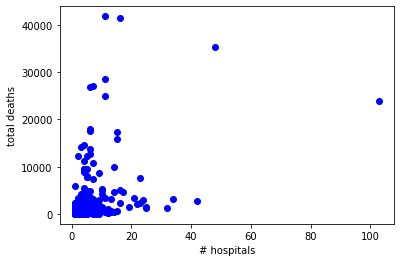

In [18]:
plt.plot(list(combined_data['HospCt'].values), list(combined_data['deaths'].values), 'bo')
plt.xlabel('# hospitals')
plt.ylabel('total deaths')

In [15]:
filter1 = combined_data['HospCt'] < 20
filter2 = combined_data['deaths'] > 300000
filtered = combined_data.where(filter1)
filtered.where(filter2, inplace=True)
filtered = filtered.dropna()
filtered.head()

,Rural-urban_Continuum Code_2013,Density per square mile of land area - Population,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,Unemployment_rate_2018,Med_HH_Income_Percent_of_State_Total_2018,Jun Temp AVG / F,Total_age65plus,Total households!!Average household size,HospCt,Beds,deaths
FIPS,,,,,,,,,,,,


In [16]:
combined_data.to_csv('../data/intermediates/pre_acpc1a.csv')

In [39]:
data_arr = combined_data.to_numpy()
X = data_arr[:,2].reshape(1, -1).T
Y = data_arr[:,3].reshape(1, -1).T
reg = lm.LinearRegression().fit(X,Y)
reg.score(X,Y)

0.909750063360748

### Lambda=20

In [40]:
acpca_data2 = pd.read_csv('../data/intermediates/post_acpca.csv')
acpca_data2.head()
acpca_arr2 = acpca_data2.to_numpy()
acpca_arr2

array([[-0.13357715, -0.34836174],
       [-0.04806537, -0.24878643],
       [ 0.04124245, -0.64554901],
       ...,
       [ 0.00339061, -0.43924696],
       [-0.39328006,  0.10036116],
       [ 0.02336271, -0.6663693 ]])

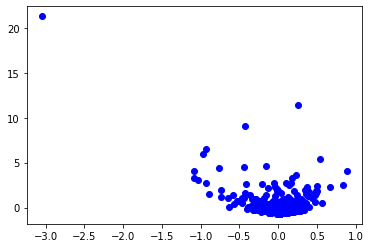

In [41]:
plt.plot(list(acpca_data2['PC1'].values), list(acpca_data2['PC2'].values), 'bo')

In [42]:
X = acpca_arr2[:,0].reshape(1, -1).T
Y = acpca_arr2[:,1].reshape(1, -1).T
reg = lm.LinearRegression().fit(X,Y)
reg.score(X,Y)

0.18707718828151065